# PROJECT ID : "PRCP-1010-InsClaimPred"
## Project Team ID : "PTID-CDS-MAY-23-1520"
### Problem Statement :
## Task 1 :
##### Create a predictive model which will help the insurance marketing team to know which customer will claim the insurance.

## Task 2 :
##### Suggestions to the Insurance market team to make customers buy the product.







## Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# importing metrics for model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score, recall_score, precision_score

In [2]:
# To Avoid Warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset

data=pd.read_csv(r"C:\Users\alanj\Downloads\PRCP-1010-InsClaimPred\Data\train.csv")
data

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              1              0              0   
4                   0              1              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                   0          0         11              0              1   
1                   0          0          3              0              0   
2                   0          0         12              1              0   
3                   0          0          8              1              0   
4                   0          0          9              1              0   
...               ...        ...        ...            ...            ...   
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                   0        0.7        0.2   0.718070             10   
1                   1        0.8        0.4   0.766078             11   
2                   0        0.0        0.0  -1.000000              7   
3                   0        0.9        0.2   0.580948              7   
4                   0        0.7        0.6   0.840759             11   
...               .

# Exploratory Data Analysis:
# Feature and feature names are unfamiliar hence we are skipping EDA.
# Basic checks

In [4]:
# To display first 5 rows of the dataset

data.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   
1              0              0              0              1              0   
2              0              0              0              1              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   
1              0              0              0              0          0   
2              0              0              0              0          0   
3              0              0              0              0          0   
4              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   
1          3              0              0              1        0.8   
2         12              1              0              0        0.0   
3          8              1              0              0        0.9   
4          9              1              0              0        0.7   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2   0.718070             10              1             -1   
1        0.4   0.766078             11              1             -1   
2        0.0  -1.000000              7              1             -1   
3        0.2   0.580948              7              1              0   
4        0.6   0.840759             11              1             -1   

   ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0              0              1              4              1              0   
1              0             -1             11              1              1   
2              0             -1             14              1              1   
3              0              1             11              1              1   
4              0             -1             14              1              1   

   ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  \
0              0              1             12          2   0.400000   
1              2              1             19          3   0.316228   
2              2              1             60          1   0.316228   
3              3              1            104          1   0.374166   
4              2              1             82          3   0.316070   

   ps_car_13  ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  \
0   0.883679   0.370810   3.605551         0.6         0.5         0.2   
1   0.618817   0.388716   2.449490         0.3         0.1         0.3   
2   0.641586   0.347275   3.316625         0.5         0.7         0.1   
3   0.542949   0.294958   2.000000         0.6         0.9         0.1   
4   0.565832   0.365103   2.000000         0.4         0.6         0.0   

   ps_calc_04  ps_calc_05  ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  \
0           3           1          10           1          10           1   
1           2           1           9           5           8           1   
2           2           2           9           1           8           2   
3           2           4           7           1           8           4   
4           2           2           6   

In [5]:
# To display last 5 rows of the dataset


data.tail()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
595207              0        0.5        0.3   0.692820             10   
595208              0        0.9        0.7   1.382027              9   
595209              0        0.9        0.2   0.659071              7   
595210              0        0.9        0.4   0.698212             11   
595211              0        0.1        0.2  -1.000000              7   

        ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  \
595207              1             -1              0              1   
595208              1             -1              0             -1   
595209              1             -1              0             -1   
595210              1             -1              0             -1   
595211              0             -1              0             -1   

        ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  \
595207              1              1              1              0   
595208             15              0              0              2   
595209              1              1              1              2   
595210             11              1              1              2   
595211              0              1              0              2   

        ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  \
595207              1             31          3   0.374166   0.684631   
595208              1             63          2   0.387298   0.972145   
595209              1             31          3   0.397492   0.596373   
595210              1            101          3   0.374166   0.764434   
595211              1             34          2   0.400000   0.932649   

        ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  \
595207   0.385487   2.645751         0.4         0.5         0.3           3   
595208  -1.000000   3.605551         0.2         0.2         0.0           2   
595209   0.398748   1.732051         0.4         0.0         0.3           3   
595210   0.384968   3.162278         0.0         0.7         0.0           4   
595211   0.378021   3.741657         0.4         0.0         0.5           2   

        ps_calc_05  ps_calc_06  

In [6]:
# to visualise reset the columns in the dataframe
pd.pandas.reset_option('display.max_columns', None)

In [7]:
# Getting all columns from the dataset

data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [8]:
# To get number of rows and columns of the dataset

data.shape

(595212, 59)

In [9]:
# To find unique value in target

data["target"].unique()

array([0, 1], dtype=int64)

In [10]:
data["target"].value_counts() # for count of target values

0    573518
1     21694
Name: target, dtype: int64

In [12]:
data["target"].agg(["count","min","max"])# min,max,count

count    595212
min           0
max           1
Name: target, dtype: int64

In [14]:
data["target"].isnull().sum()

0

In [15]:
# To check all the null values from the dataset

data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [16]:
# Print a concise summary of a DataFrame. 
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [18]:
# To check the type of features.

data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

## Target Analysis
### This column signifies whether or not the claim was filed for that policy holder.

- Claimed
- Didn't claim

<AxesSubplot:xlabel='target', ylabel='count'>

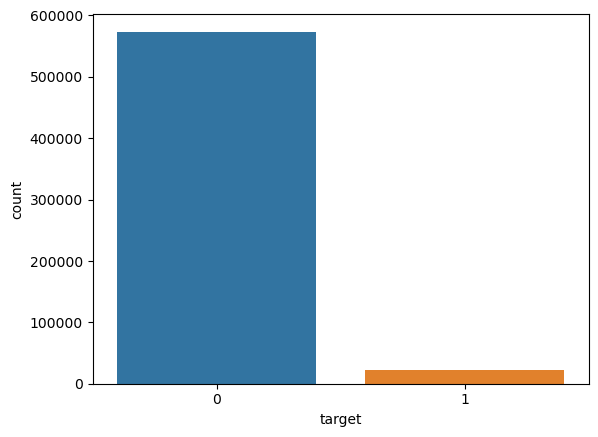

In [19]:
sns.countplot(x="target",data=data)

- From the given data more than 95% of people will not claim the insurance 
- less than 5 percentage of people will claim the insurance

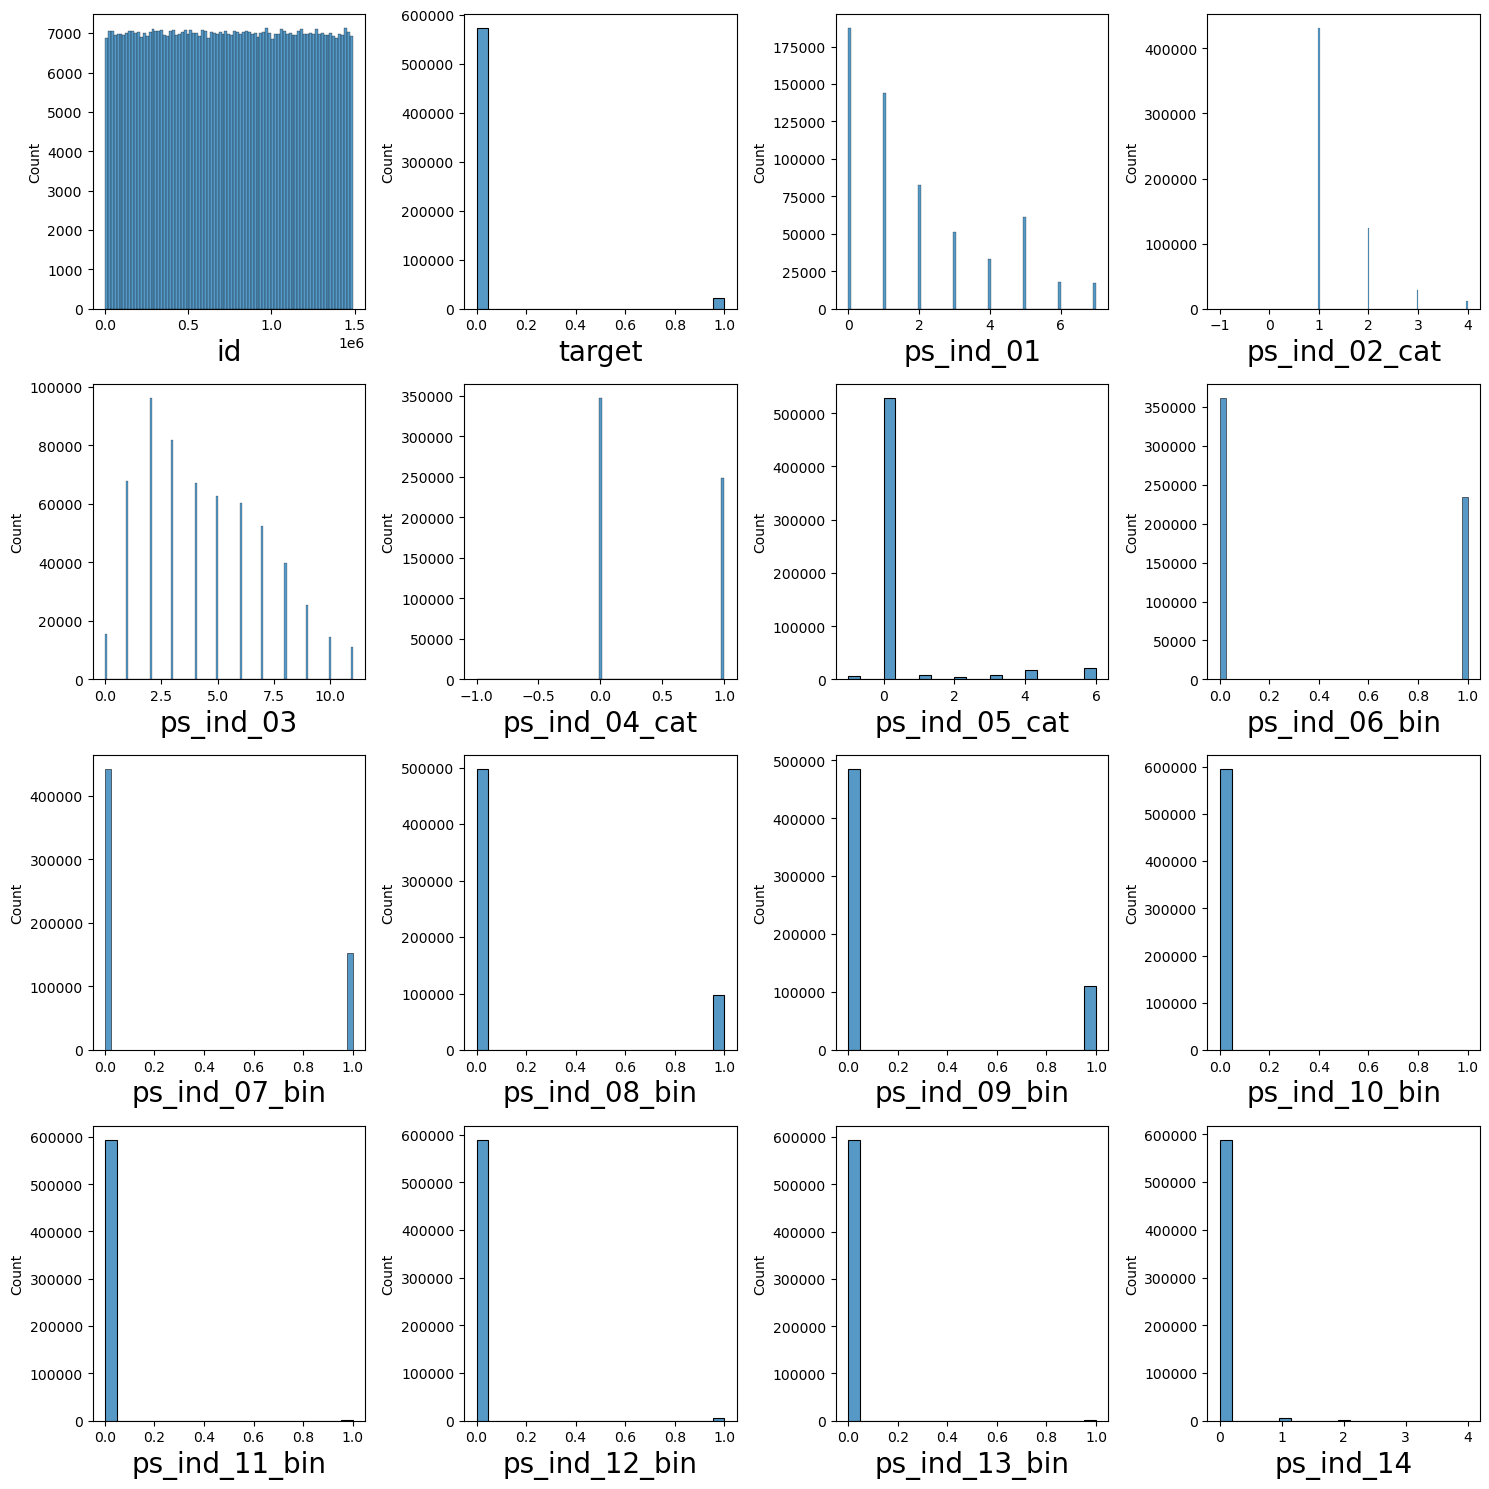

In [20]:
plt.figure(figsize=(15,15), facecolor='white')#To set canvas 
plotnumber = 1 #counter

for column in data:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()

In [21]:
# To view some basic statistical details like mean, standard deviation, percentile, etc

# it helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

data.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.358943   
std    4.293678e+05       0.187401       1.983789       0.664594   
min    7.000000e+00       0.000000       0.000000      -1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416794       0.405188       0.393742   
std         2.699902       0.493311       1.350642       0.488579   
min         0.000000      -1.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ...     ps_calc_11     ps_calc_12  \
count  595212.000000  595212.000000  ...  595212.000000  595212.000000   
mean        0.257033       0.163921  ...       5.441382       1.441918   
std         0.436998       0.370205  ...       2.332871       1.202963   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       4.000000       1.000000   
50%         0.000000       0.000000  ...       5.000000       1.000000   
75%         1.000000       0.000000  ...       7.000000       2.000000   
max         1.000000       1.000000  ...      19.000000      10.000000   

          ps_calc_13     ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
count  595212.000000  595212.000000   595212.000000   595212.000000   
mean        2.872288       7.539026        0.122427        0.627840   
std         1.694887       2.746652        0.327779        0.483381   
min         0.000000       0.000000        0.000000        0.000000   
25%         2.000000       6.000000        0.000000        0.000000   
50%         3.000000       7.000000        0.000000        1.000000   
75%         4.000000       9.000000        0.000000        1.000000   
max        13.000000      23.000000        1.000000        1.000000   

       ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
count   595212.000000   595212.000000   595212.000000   595212.000000  
mean         0.554182        0.287182        0.349024        0.153318  
std          0.497056        0.452447        0.476662        0.360295  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          1.000000        0.000000        0.000000        0.000000  
75%          1.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 59 columns]

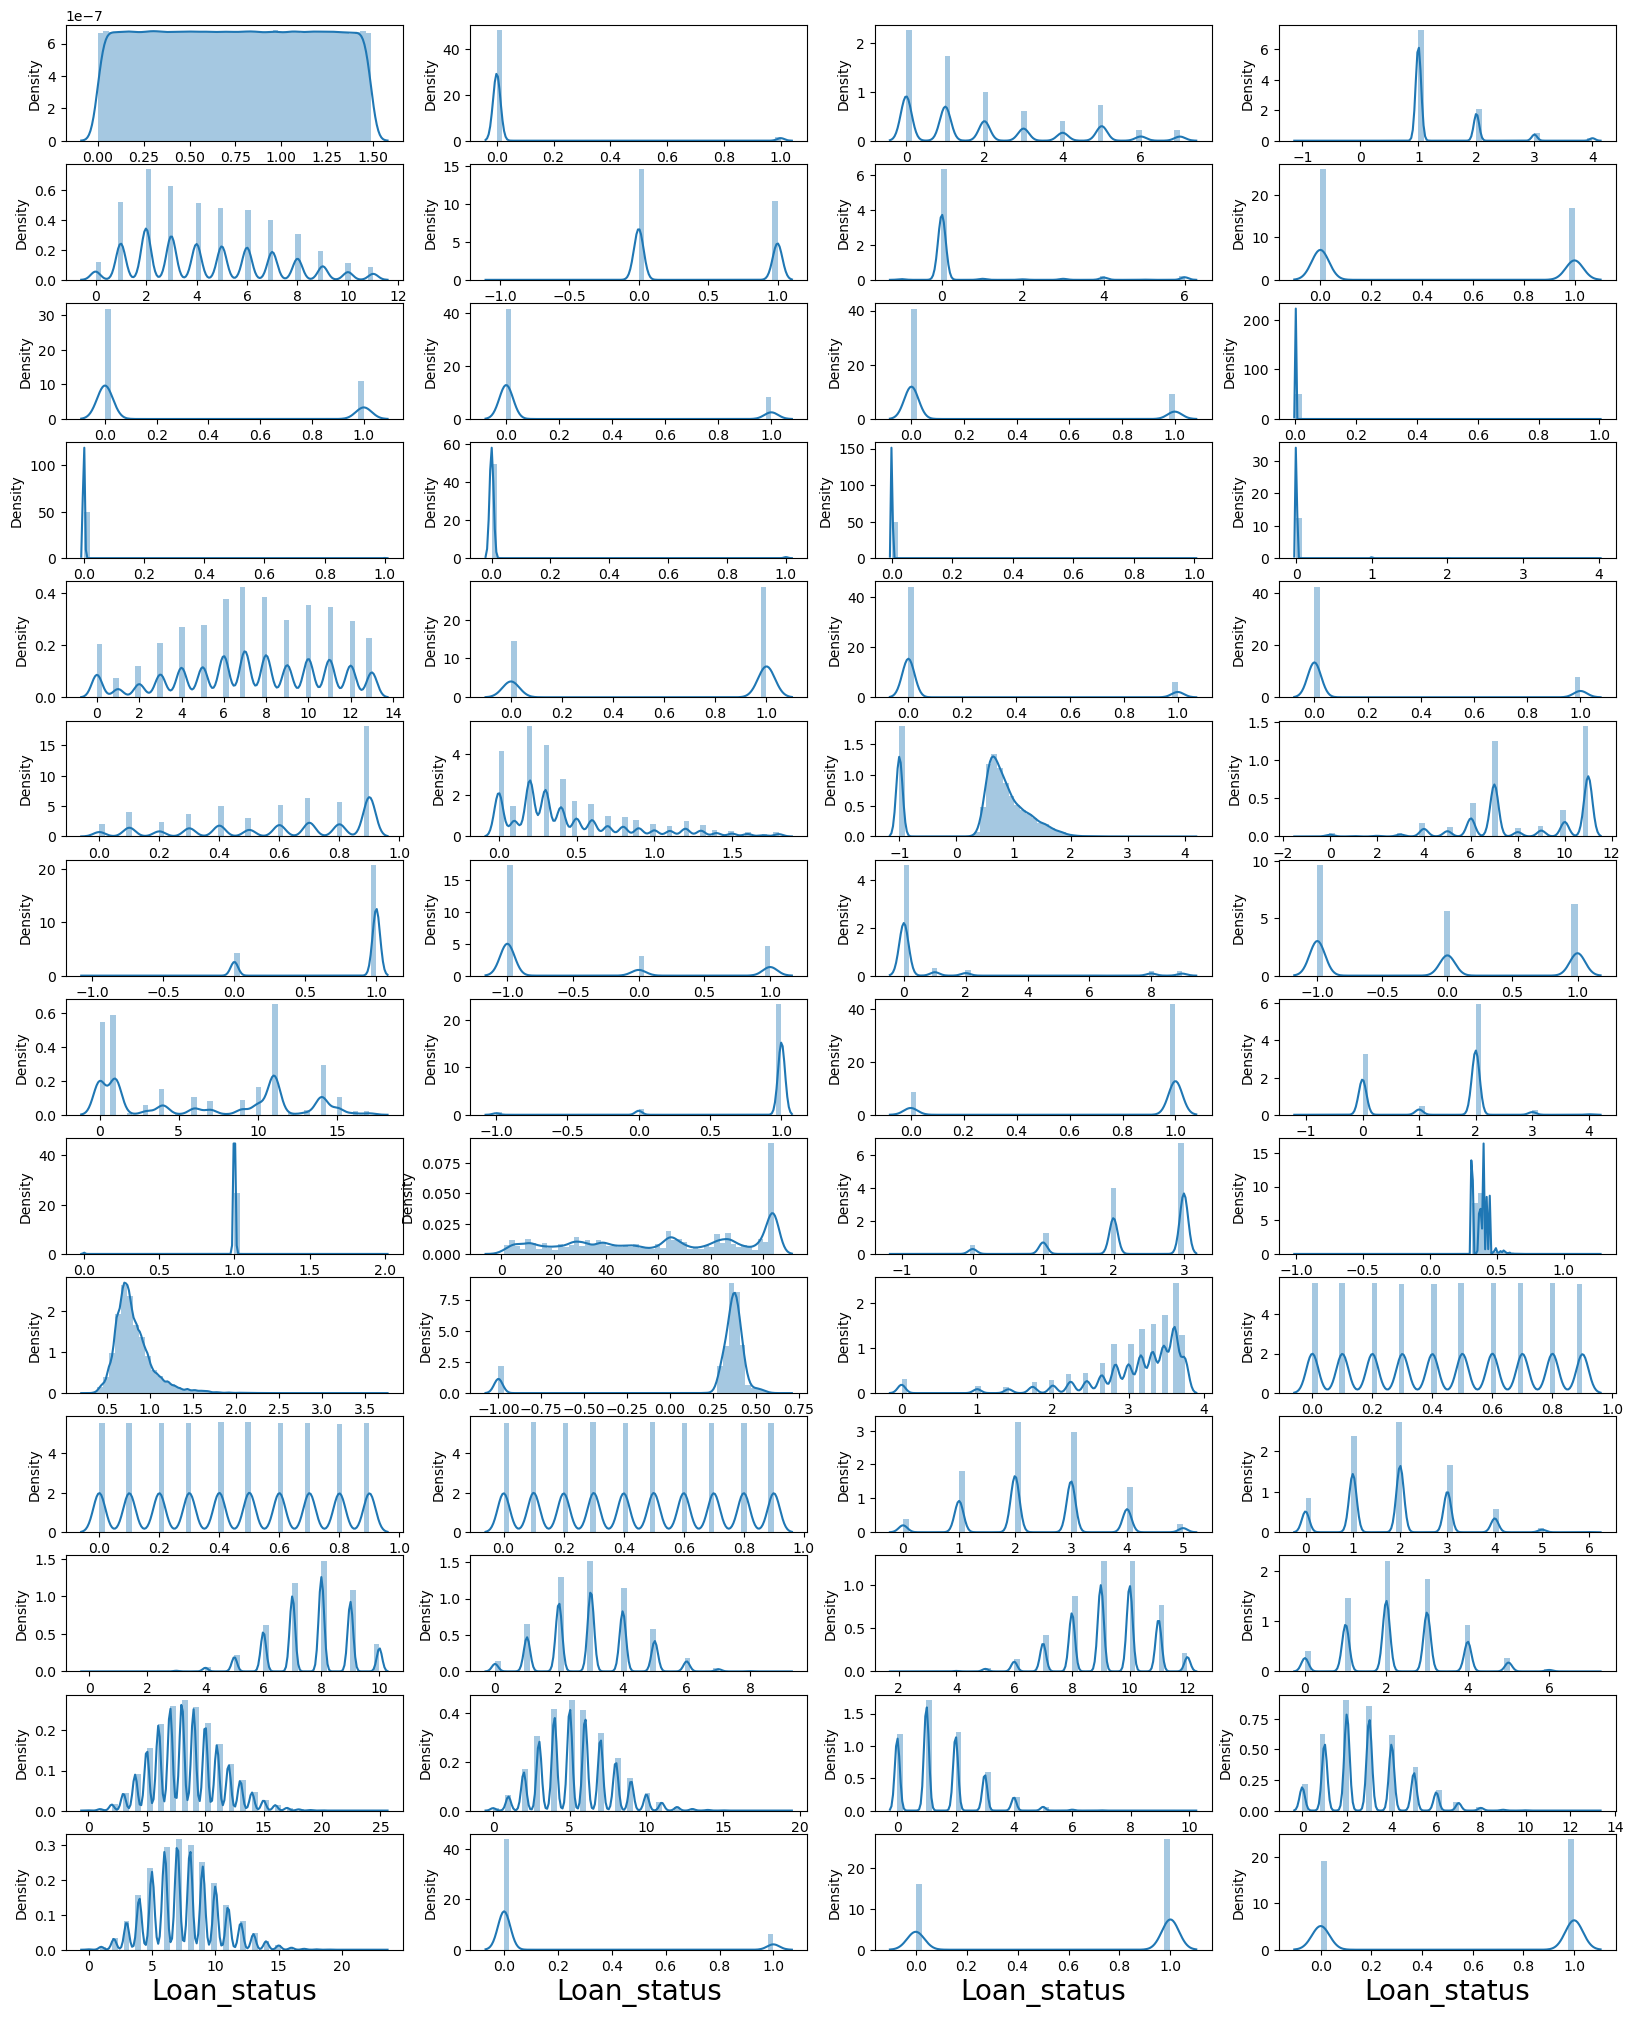

In [22]:
#how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=56 :# as there are 9 columns in the data
        ax = plt.subplot(14,4,plotnumber)# plotting 9 graphs (14-rows,4-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        plt.xlabel("Loan_status",fontsize=20)
    plotnumber+=1
plt.show()

## From the above plots, we conclude :

- The data is non linear.
- The data is highly imbalanced.



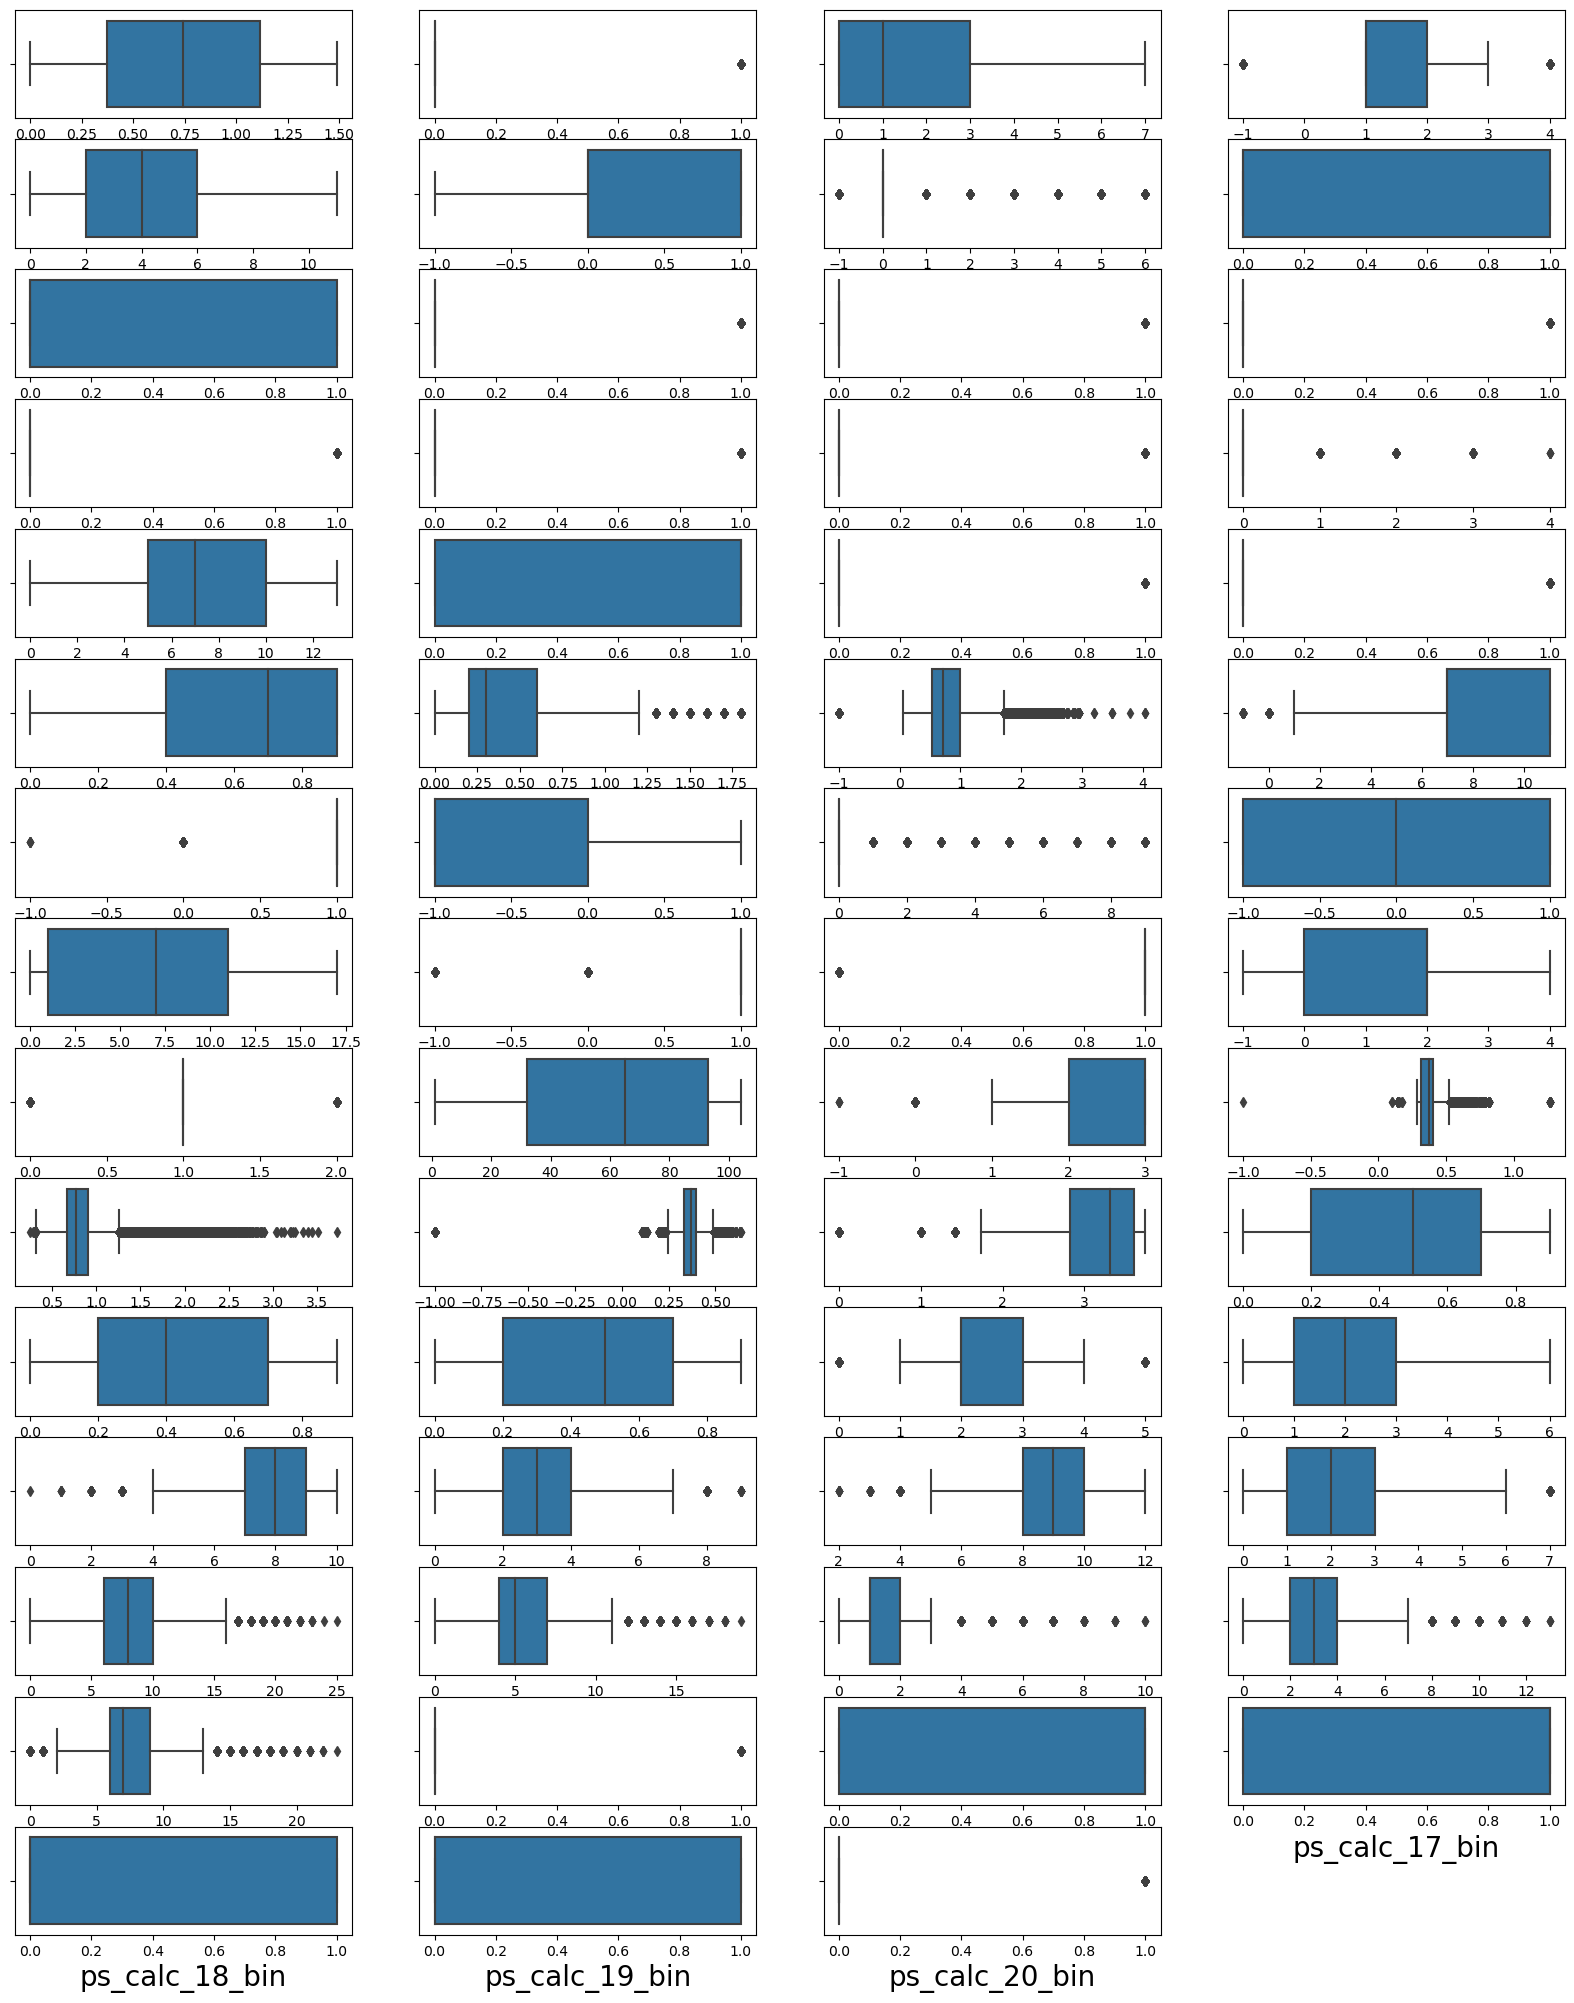

In [30]:
# Checking for outliers
# data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=60 :
        ax = plt.subplot(15,4,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Feature Selection

# Steps to follow in feature selection
1)Removing redundant columns-->one target value columns,ids columns,

2)Check for highly correlated features.If correlation between 2 
numerical feature is more than 0.9,remove one of them.

<AxesSubplot:>

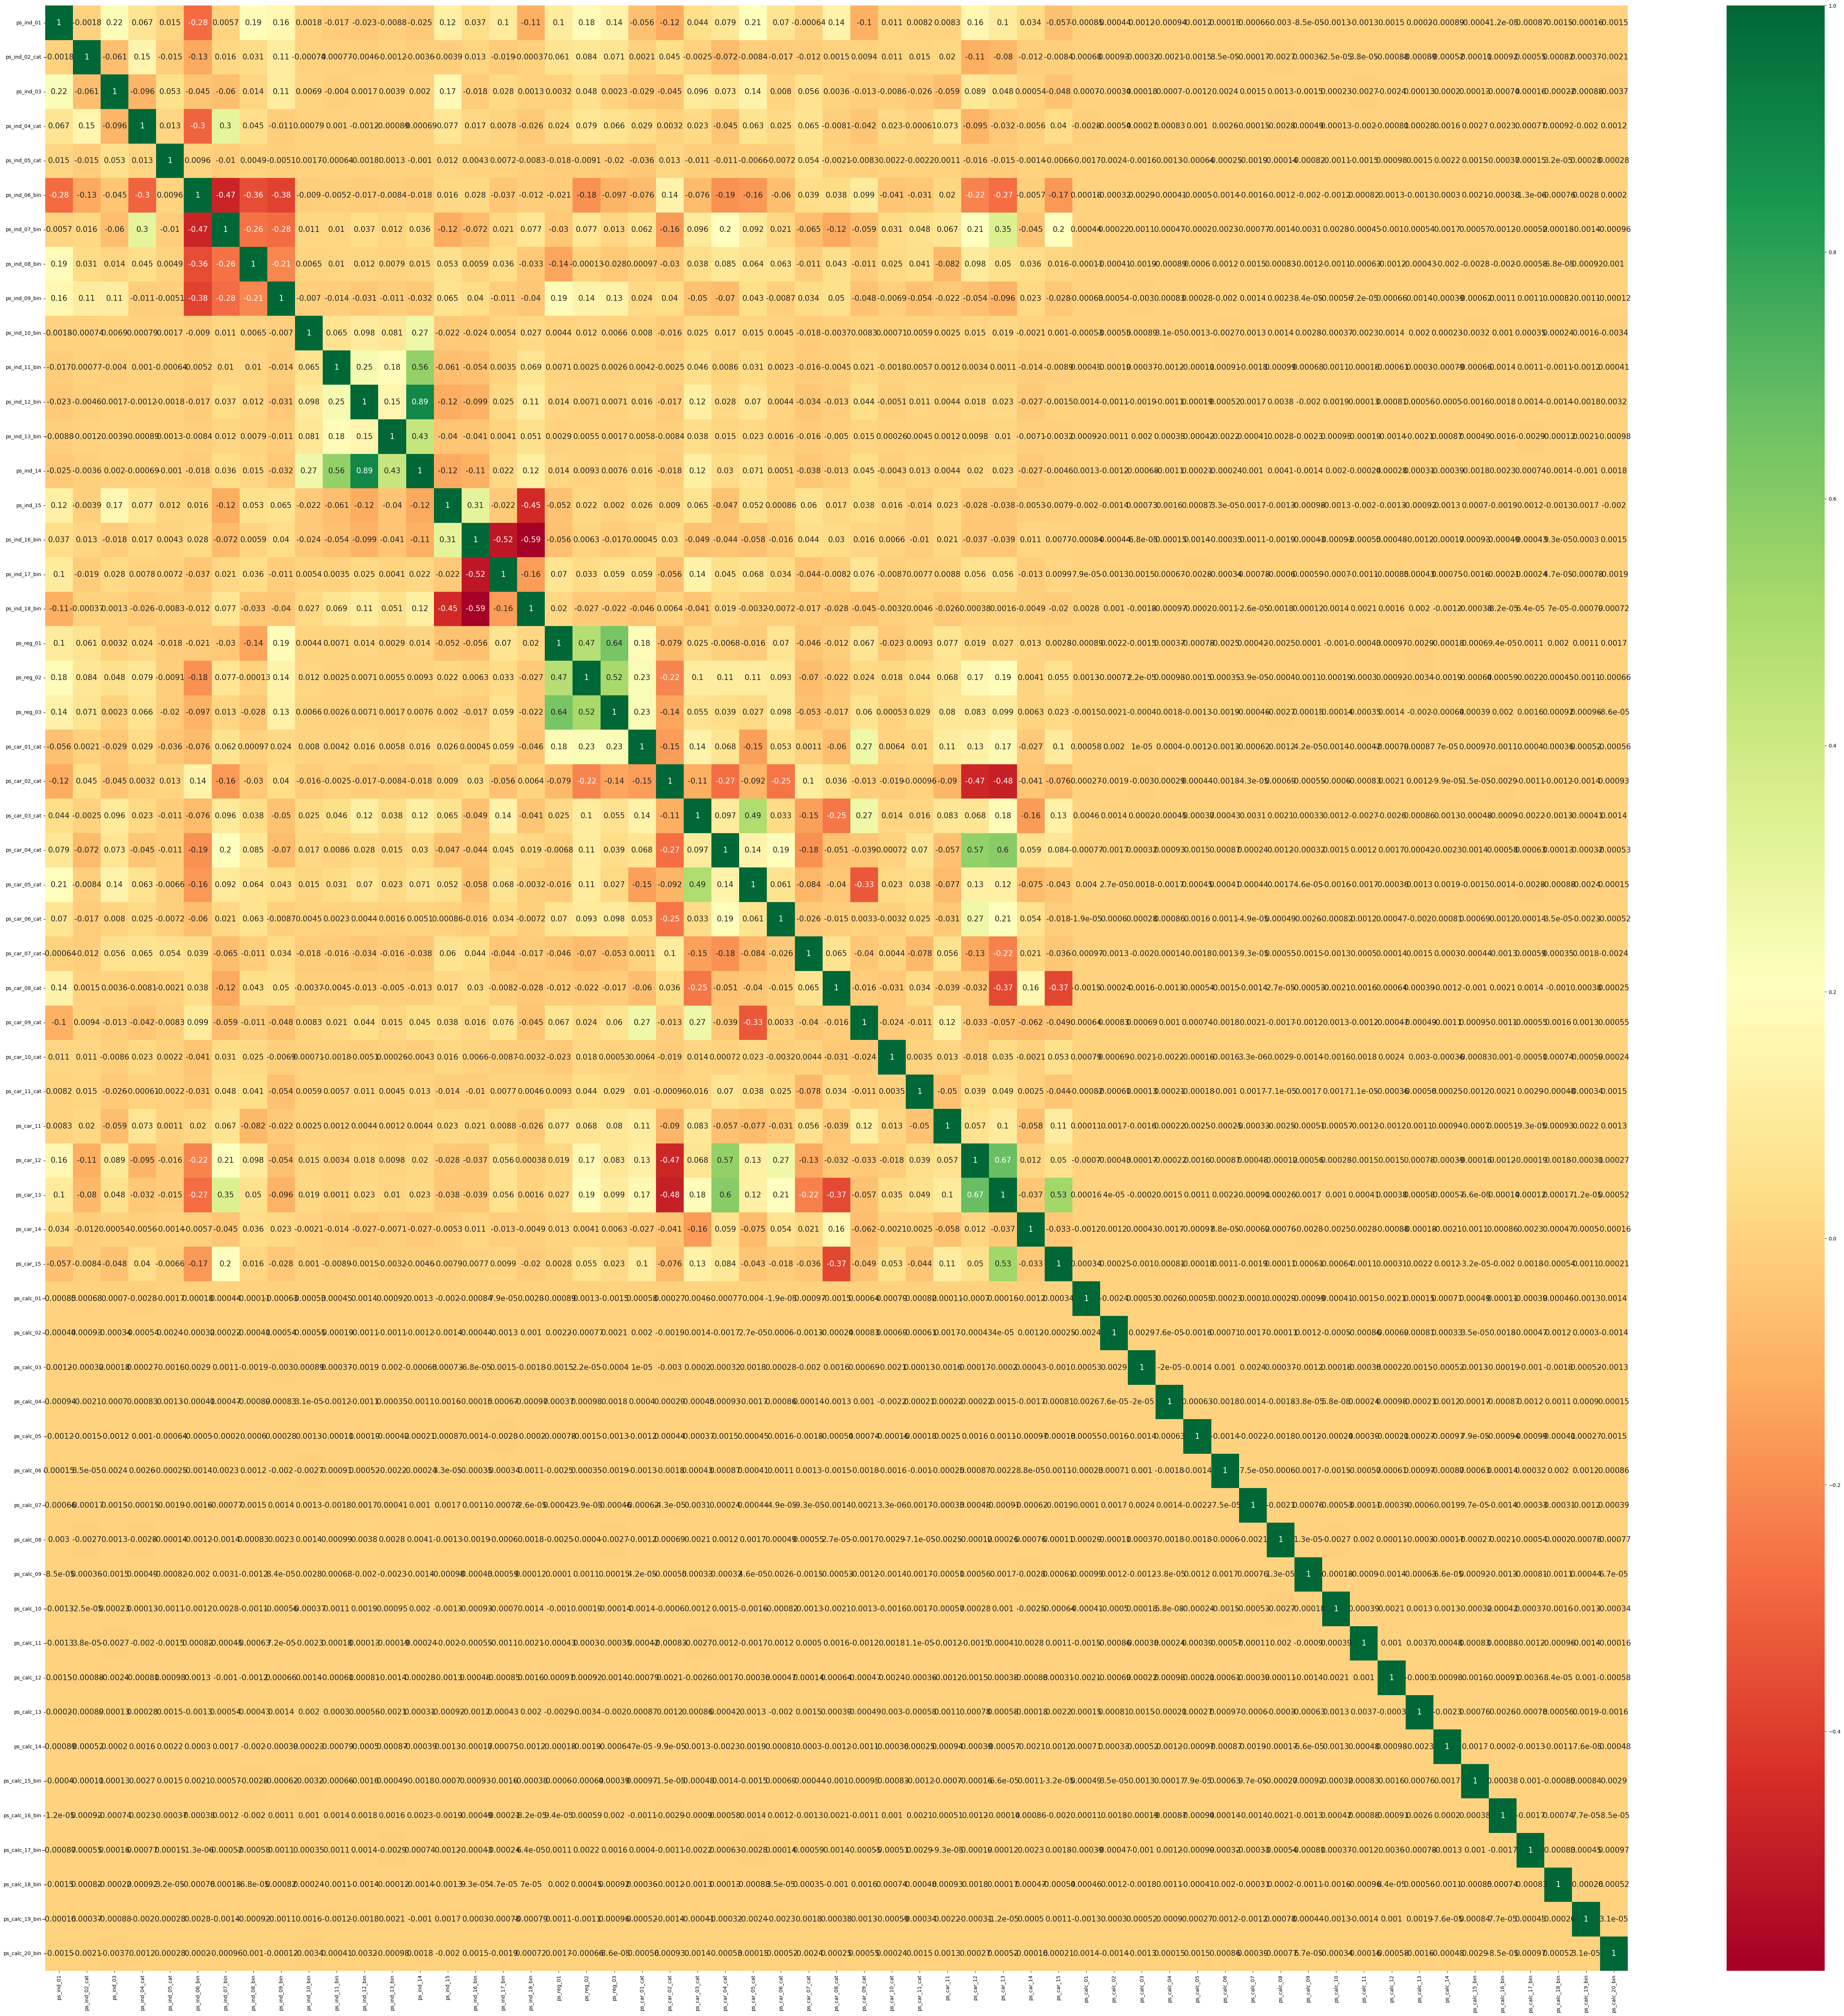

In [29]:
x1 = data.drop(["id", "target"], axis=1) # dropping id and target column
## Checking correlation

plt.figure(figsize=(70, 70))#canvas size
sns.heatmap(x1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [31]:
x1.corr()## Checking correlation

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
ps_ind_01        1.000000      -0.001793   0.223408       0.066645   
ps_ind_02_cat   -0.001793       1.000000  -0.061189       0.147110   
ps_ind_03        0.223408      -0.061189   1.000000      -0.095856   
ps_ind_04_cat    0.066645       0.147110  -0.095856       1.000000   
ps_ind_05_cat    0.014823      -0.014860   0.053250       0.013053   
ps_ind_06_bin   -0.277458      -0.125653  -0.045158      -0.297737   
ps_ind_07_bin    0.005700       0.016398  -0.060368       0.304949   
ps_ind_08_bin    0.188583       0.030945   0.014037       0.044978   
ps_ind_09_bin    0.162800       0.110076   0.111306      -0.011442   
ps_ind_10_bin    0.001847      -0.000744   0.006865       0.000789   
ps_ind_11_bin   -0.016727       0.000772  -0.003986       0.001018   
ps_ind_12_bin   -0.023406      -0.004616   0.001698      -0.001217   
ps_ind_13_bin   -0.008776      -0.001187   0.003929      -0.000893   
ps_ind_14       -0.024971      -0.003649   0.001990      -0.000691   
ps_ind_15        0.122137      -0.003854   0.170449       0.077071   
ps_ind_16_bin    0.036896       0.012682  -0.018251       0.017497   
ps_ind_17_bin    0.101257      -0.018727   0.027691       0.007830   
ps_ind_18_bin   -0.112226      -0.000374   0.001316      -0.025797   
ps_reg_01        0.102212       0.061118   0.003209       0.023846   
ps_reg_02        0.183855       0.084260   0.048338       0.079471   
ps_reg_03        0.139125       0.070790   0.002348       0.065702   
ps_car_01_cat   -0.056121       0.002149  -0.028520       0.029379   
ps_car_02_cat   -0.116987       0.045233  -0.044907       0.003162   
ps_car_03_cat    0.043756      -0.002532   0.095658       0.022744   
ps_car_04_cat    0.079042      -0.072190   0.072990      -0.045361   
ps_car_05_cat    0.213009      -0.008407   0.143597       0.063399   
ps_car_06_cat    0.070192      -0.017301   0.008021       0.025324   
ps_car_07_cat   -0.000639      -0.011781   0.056337       0.064655   
ps_car_08_cat    0.138112       0.001526   0.003607      -0.008148   
ps_car_09_cat   -0.102582       0.009435  -0.013205      -0.041983   
ps_car_10_cat    0.010794       0.011401  -0.008561       0.023010   
ps_car_11_cat    0.008188       0.014955  -0.025966      -0.000615   
ps_car_11        0.008252       0.019949  -0.059358       0.073486   
ps_car_12        0.161842      -0.110247   0.088992      -0.095160   
ps_car_13        0.099752      -0.080408   0.048308      -0.032233   
ps_car_14        0.034480      -0.012272   0.000539      -0.005596   
ps_car_15       -0.056722      -0.008391  -0.048096       0.040480   
ps_calc_01      -0.000854       0.000683   0.000703      -0.002753   
ps_calc_02      -0.000437       0.000932  -0.000335      -0.000544   
ps_calc_03       0.001214      -0.000322   0.000177       0.000270   
ps_calc_04      -0.000943      -0.002111   0.000703       0.000826   
ps_calc_05      -0.001171      -0.001548  -0.001245       0.001028   
ps_calc_06       0.000147       0.000085   0.002361       0.002626   
ps_calc_07      -0.000658      -0.000172   0.001533      -0.000151   
ps_calc_08       0.002993      -0.002712   0.001267      -0.002776   
ps_calc_09      -0.000085       0.000356  -0.001544       0.000487   
ps_calc_10      -0.001345      -0.000025   0.000230       0.000127   
ps_calc_11      -0.001263       0.000038  -0.002716      -0.002001   
ps_calc_12       0.001521      -0.000884  -0.002352      -0.000814   
ps_calc_13       0.000199      -0.000893   0.000133       0.000283   
ps_calc_14      -0.000891      -0.000519   0.000205       0.001565   
ps_calc_15_bin  -0.000397      -0.000109   0.000134       0.002735   
ps_calc_16_bin  -0.000012       0.000920  -0.000744       0.002295   
ps_calc_17_bin  -0.000868       0.000547   0.000158       0.000773   
ps_calc_18_bin  -0.001504       0.000824  -0.000218       0.000916   
ps_calc_19_bin  -0.000162       0.000367  -0.000882      -0.001966   
ps_calc_20_bin  -0.001464 

<!-- Since there are no observed features with high mutual correlation, we will be considering all the independent features for our model creation. -->

### Since there are no observed features with high mutual correlation, we will be considering all the independent features for our model creation.

# splitting dataset into X and y

In [27]:
x = data.drop(["id", "target"], axis=1).reset_index(drop=True) # dropped id and target collumn

In [28]:
y=data["target"]   #droped the target


## The train-test split is a technique for evaluating the performance of a machine learning  algorithm.

#### Train Dataset: 
- Used to train the machine learning model.

#### Test Dataset:
- Used to evaluate the machine learning model.

#### Common split percentages include:

- Train: 80%,   Test: 20%

- Train: 67%,   Test: 33%

- Train: 75%,   Test: 25%

- I've used  75%  train and  25%  test

In [32]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [35]:
# Checking the dimension of our train and test splits
print('Shape of x_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (446409, 57)
Shape of y_train:  (446409,)
Shape of x_test:  (148803, 57)
Shape of y_test:  (148803,)


## Model Building and Performation Evaluation:

## Logistic Regression


In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred1 = LR.predict(X_train)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
acc = accuracy_score(y_train, y_pred1)
acc

0.963387834922683

In [47]:
acc = accuracy_score(y_test, y_pred)
acc

0.9640464237952192

In [46]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143453
           1       0.00      0.00      0.00      5350

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



In [44]:
print(classification_report(y_train, y_pred1)) #train data

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    430065
           1       0.00      0.00      0.00     16344

    accuracy                           0.96    446409
   macro avg       0.48      0.50      0.49    446409
weighted avg       0.93      0.96      0.95    446409



# DecisionTree

In [48]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_train, y_train)#training the model


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
y_hat=dt.predict(X_train)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
y_hat1=dt.predict(X_test)#prediction
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print(classification_report(y_test,y_hat1)) # test data

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    143453
           1       0.05      0.07      0.06      5350

    accuracy                           0.92    148803
   macro avg       0.51      0.51      0.51    148803
weighted avg       0.93      0.92      0.93    148803



In [49]:
print(classification_report(y_train,y_hat)) # train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430065
           1       1.00      1.00      1.00     16344

    accuracy                           1.00    446409
   macro avg       1.00      1.00      1.00    446409
weighted avg       1.00      1.00      1.00    446409



#### we tried with knn,svm,gradient boosting,xg boost 
##### but those models are also overfitting

# Smoting

### since the data is highly imbalace applied smoting

In [53]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [54]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [55]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 430065, 1: 16344})
SMOTE Classes Counter({0: 430065, 1: 430065})


# Models with smoting data

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LR_s = LogisticRegression()
LR_s.fit(X_smote, y_smote)

LogisticRegression()

In [62]:
y_sm_pred1 = LR_s.predict(X_smote)
y_sm_pred1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [59]:
print(classification_report(y_smote,y_sm_pred1)) #training data with smote

              precision    recall  f1-score   support

           0       0.85      0.90      0.87    430065
           1       0.89      0.84      0.87    430065

    accuracy                           0.87    860130
   macro avg       0.87      0.87      0.87    860130
weighted avg       0.87      0.87      0.87    860130



In [63]:
y_pred = LR_s.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred)) #test data

              precision    recall  f1-score   support

           0       0.96      0.90      0.93    143453
           1       0.04      0.12      0.06      5350

    accuracy                           0.87    148803
   macro avg       0.50      0.51      0.50    148803
weighted avg       0.93      0.87      0.90    148803



In [65]:
confusion_matrix(y_smote, y_sm_pred1)

array([[385441,  44624],
       [ 67595, 362470]], dtype=int64)

In [66]:
confusion_matrix(y_test,y_pred)

array([[128525,  14928],
       [  4689,    661]], dtype=int64)

# DecisionTree

In [67]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_smote, y_smote)#training the model
y_hat=dt.predict(X_smote)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
y_test_predict2=dt.predict(X_test)#predicting training data to check training performance 
y_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
y_train_predict1=dt.predict(X_smote)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
print(classification_report(y_smote,y_train_predict1))# it will give precision,recall,f1 scores and accuracy  #train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430065
           1       1.00      1.00      1.00    430065

    accuracy                           1.00    860130
   macro avg       1.00      1.00      1.00    860130
weighted avg       1.00      1.00      1.00    860130



In [74]:
print(classification_report(y_test,y_test_predict2))# it will give precision,recall,f1 scores and accuracy #test dat

              precision    recall  f1-score   support

           0       0.96      0.93      0.95    143453
           1       0.04      0.08      0.06      5350

    accuracy                           0.90    148803
   macro avg       0.50      0.51      0.50    148803
weighted avg       0.93      0.90      0.92    148803



# GradientBoosting

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
dt.fit(X_smote, y_smote)

GradientBoostingClassifier()

In [117]:
y_pred2=dt.predict(X_smote)
y_pred2

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [119]:
print(classification_report(y_smote,y_pred2))   #train data

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    430065
           1       0.98      0.93      0.96    430065

    accuracy                           0.96    860130
   macro avg       0.96      0.96      0.96    860130
weighted avg       0.96      0.96      0.96    860130



In [122]:
y_pred3=dt.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
print(classification_report(y_test,y_pred3)) #test data

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    143453
           1       0.05      0.02      0.03      5350

    accuracy                           0.95    148803
   macro avg       0.51      0.50      0.50    148803
weighted avg       0.93      0.95      0.94    148803



# Decision tree with smoting and hyperparameter tuning

In [110]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_smote, y_smote)#training the model
y_hat=dt.predict(X_smote)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [111]:
y_train_predict=dt.predict(X_smote)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [112]:
print(classification_report(y_smote,y_hat))# it will give precision,recall,f1 scores and accuracy   #train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430065
           1       1.00      1.00      1.00    430065

    accuracy                           1.00    860130
   macro avg       1.00      1.00      1.00    860130
weighted avg       1.00      1.00      1.00    860130



In [113]:
y_train_predict1=dt.predict(X_test)#predicting training data to check training performance 
y_train_predict1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
print(classification_report(y_test,y_train_predict1))   #test data

              precision    recall  f1-score   support

           0       0.96      0.93      0.95    143453
           1       0.04      0.08      0.06      5350

    accuracy                           0.90    148803
   macro avg       0.50      0.51      0.50    148803
weighted avg       0.93      0.90      0.92    148803



In [ ]:
#hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=3)

#passing model to gridsearchCV ,

In [77]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3


- tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=3)
- tree_cv.fit(X_smote, y_smote)#training data on gridsearch cv

- Fitting 3 folds for each of 4332 candidates, totalling 12996 fits

In [84]:
# best_params = tree_cv.best_params_#it will give you best parameters 
# print(f"Best paramters: {best_params})")#printing  best parameters

In [81]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'best'})

In [85]:
# tree_cv.best_params_#getting best parameters from cv

In [87]:
# tree_cv.best_score_#getting best score form cv

In [88]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf= 12,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [89]:
dt1.fit(X_smote, y_smote)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=12)

In [90]:
y_hat1 = dt1.predict(X_test)#predicting
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
acc_test = accuracy_score(y_test, y_hat1)#checking accuracy
acc_test

0.9208080482248342

In [92]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy #test data

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    143453
           1       0.05      0.06      0.06      5350

    accuracy                           0.92    148803
   macro avg       0.51      0.51      0.51    148803
weighted avg       0.93      0.92      0.93    148803



In [93]:
y_pred_train1  = dt1.predict(X_smote)

In [94]:
print(classification_report(y_smote, y_pred_train1))   #train data

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    430065
           1       0.97      0.94      0.95    430065

    accuracy                           0.95    860130
   macro avg       0.95      0.95      0.95    860130
weighted avg       0.95      0.95      0.95    860130



In [125]:
pd.crosstab(y_smote, y_pred_train1)  

col_0        0       1
target                
0       415383   14682
1        24618  405447

# Project Outcomes & Conclusions:

## Here are some of the key outcomes of the project:

- The Dataset was large, totally around 6 lakhs samples 
- The samples were highly imbalanced hence over sampling, undersampling, SMOTE Technique were applied on the data to balance the classes to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature set.

- Testing multiple algorithms with fine-tuning hyperparamters gave some understanding on the model performance for various algorithms on this specific dataset.
- The hyperparameter tuning on dicision tree helps in the good performance on the current dataset.

## Problems :

- The data is non linear and highly imbalanced which resulted in Over-fitting.
- It was difficult to understand data and pre-process due to the data and its features names was irrelevant.
- The run time was high during fitting the model.
- Accuracy was good for few models but the problem was there was a huge number of imbalance data as result accuracy was poor.
- hyperparameter tunings took too much time to get the best parameters
- As the result of huge data its taking too much run time inthe model

## Model Comparision Report :

- We used Logistic Regression, Decision Tree, Random Forest, XGBoost along with OverSampling, UnderSampling
- The final model we applied is Decision Tree with hyperparameter tuning which is preferred among all the models as it gave the best accuracy.